In [5]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns

# **1. LOAD DATASET**

In [6]:
df = pd.read_csv("athletes new.csv")

# **2. GENERAL INFORMATION USING METHODS AS**: HEAD, SHAPE, DESCRIBE, INFO, COLUMNS

In [7]:
#The first 5 rows of the dataframe

df.head(5)

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [8]:
#Headers dataframe
df.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_full', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date'],
      dtype='object')

In [9]:
df.shape

(11115, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11115 non-null  int64  
 1   name              11115 non-null  object 
 2   name_short        11115 non-null  object 
 3   name_tv           11115 non-null  object 
 4   gender            11115 non-null  object 
 5   function          11115 non-null  object 
 6   country_code      11115 non-null  object 
 7   country           11115 non-null  object 
 8   country_full      11115 non-null  object 
 9   nationality       11115 non-null  object 
 10  nationality_full  11115 non-null  object 
 11  nationality_code  11115 non-null  object 
 12  height            11115 non-null  int64  
 13  weight            11099 non-null  float64
 14  disciplines       11115 non-null  object 
 15  events            11115 non-null  object 
 16  birth_date        11115 non-null  object

In [11]:
df.describe()

,code,height,weight
count,1.111500e+04,11115.000000,11099.000000
mean,1.887426e+06,81.835178,2.213713
std,3.587687e+05,89.504711,13.114771
min,1.532872e+06,0.000000,0.000000
25%,1.888186e+06,0.000000,0.000000
50%,1.918842e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000



# **3. IDENTIFY MISSING VALUES**

In [12]:
#Evaluation for missing data

missing_data = df.isnull()
missing_data.head(5)

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#As mentioned above, "True" represents a missing value and "False" means the value is present in the data set.  
#In the body of the for loop the method ".value_counts()" counts the number of "True" values. 

for colum in missing_data.columns.values.tolist():
    print(colum)
    print(missing_data[colum].value_counts())
    print("________________________________")

code
code
False    11115
Name: count, dtype: int64
________________________________
name
name
False    11115
Name: count, dtype: int64
________________________________
name_short
name_short
False    11115
Name: count, dtype: int64
________________________________
name_tv
name_tv
False    11115
Name: count, dtype: int64
________________________________
gender
gender
False    11115
Name: count, dtype: int64
________________________________
function
function
False    11115
Name: count, dtype: int64
________________________________
country_code
country_code
False    11115
Name: count, dtype: int64
________________________________
country
country
False    11115
Name: count, dtype: int64
________________________________
country_full
country_full
False    11115
Name: count, dtype: int64
________________________________
nationality
nationality
False    11115
Name: count, dtype: int64
________________________________
nationality_full
nationality_full
False    11115
Name: count, dtype: int64
___

In [14]:
# Number of entries with missing values in the 'weight'
missing_data_weight = missing_data['weight'].sum()
print(f"Number of entries with missing values in the 'weight' column: {missing_data_weight }")

Number of entries with missing values in the 'weight' column: 16


# 4. DISTRIBUTION GENDER

In [15]:
distribution_gender = df['gender'].value_counts()
distribution_gender

gender
Male      5655
Female    5460
Name: count, dtype: int64

# 5. COUNTRY WITH MORE ATHLETES

In [16]:
country_athletes = df['country'].value_counts()

summary_country_athletes_ = country_athletes.idxmax()
summary_athletes = country_athletes.max()

print(f"Country with the most athletes: {summary_country_athletes_}")
print(f"Total athletes: {summary_athletes}")

Country with the most athletes: United States
Total athletes: 620


# 6. AVERAGE WEIGHT AND HEIGHT OF ATHLETES FOR EACH COUNTRY

In [17]:

avg = df.groupby('country')[['height','weight']].mean()
print(avg)


                        height  weight
country                               
AIN                  39.718750     0.0
Afghanistan          57.000000     0.0
Albania              44.250000     0.0
Algeria              59.195652     0.0
American Samoa       76.000000     0.0
...                        ...     ...
Virgin Islands, B   129.250000     0.0
Virgin Islands, US   36.000000     0.0
Yemen                45.750000     0.0
Zambia              147.322581     0.0
Zimbabwe             49.428571     0.0

[206 rows x 2 columns]


# 7. AVERAGE AGE OF ATHLETES FOR EACH COUNTRY

In [18]:
df['birth_date'] = pd.to_datetime(df['birth_date']) #datetime64[ns]

df['years'] = (pd.Timestamp.today() - df['birth_date']).dt.days // 365 #int64

avg_years = df['years'].mean()

print(f"The average age of athletes for each country is:{avg_years.round(2)}")





The average age of athletes for each country is:26.88


# 8. AVERAGE AGE IN WOMENS AND MAN OF ATHLETES

In [19]:
avg_w_m = df.groupby('gender')['years'].mean()
avg_w_m



gender
Female    26.509158
Male      27.242087
Name: years, dtype: float64

# 9. Generate a bar chart showing the number of athletes from each country

C:\Users\Antonio Palau Pamies\AppData\Local\Temp\ipykernel_17644\4283110848.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=ath_10, x='country', y='number_of_athletes', palette='cubehelix', edgecolor='black')


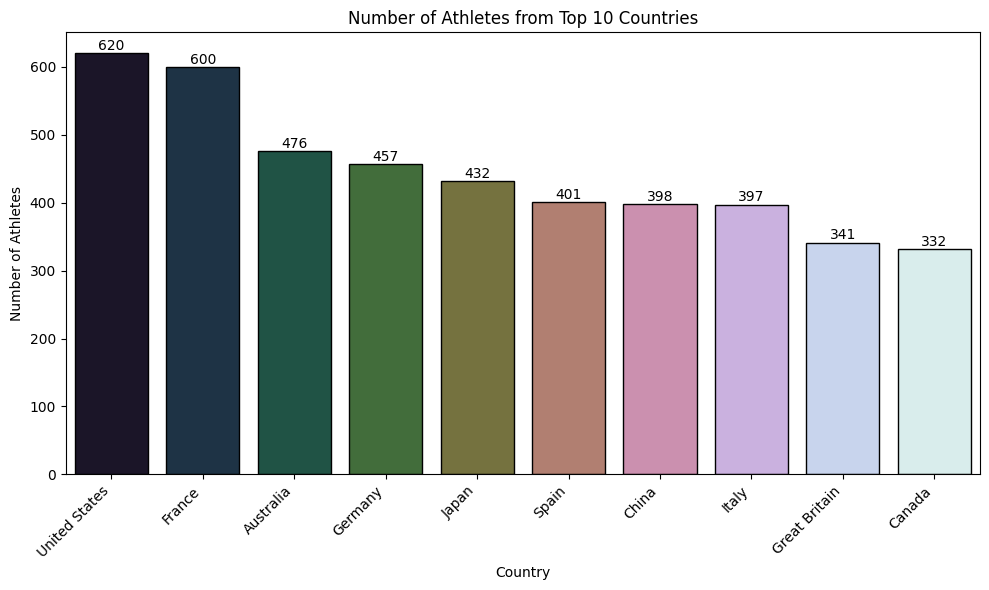

In [20]:
athletes_10_countrys = df['country'].value_counts()

ath_10_coun= athletes_10_countrys.head(10)

ath_10 = ath_10_coun.reset_index()
ath_10.columns=['country', 'number_of_athletes']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=ath_10, x='country', y='number_of_athletes', palette='cubehelix', edgecolor='black')
for index, row in ath_10.iterrows():
    barplot.text(index, row['number_of_athletes'] + 5, str(row['number_of_athletes']), color='black', ha='center')
plt.title('Number of Athletes from Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 10. Plot a pie chart to represent the proportion of athletes by top 10 country


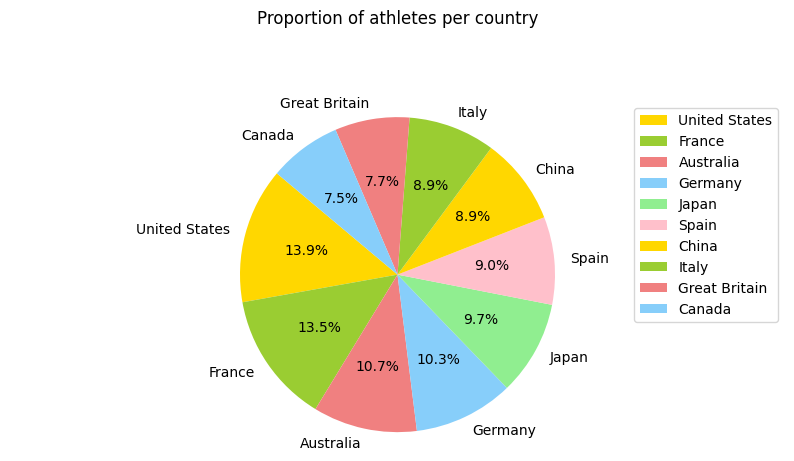

In [22]:
ath_10_coun= athletes_10_countrys.head(10) #Select the top 10 countries
colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'] #Colors of the diagram

plt.figure(figsize=(10, 4.5))
plt.pie(ath_10_coun, labels=ath_10_coun.index, autopct='%1.1f%%', startangle=140, colors= colors_list) #Select the data "ath_10_coun" to made the diagram


plt.legend(labels= ath_10_coun.index, loc='upper right') #bbox_to_anchor=(1.40, 1) We can modify the legend size with this code
plt.title('Proportion of athletes per country',y=1.2) 
plt.axis('equal')
plt.show()